In [31]:
# %matplotlib inline

import numpy as np
import pandas as pd
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from pylab import imshow, show, get_cmap


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format = 'retina'

In [32]:
# load data 
df = pd.read_csv('Hadera_2015.csv')

In [33]:
df.head()

,Variable,date,Hour,Value
0,speed,01-01-2015,02:00,2.5
1,direction,01-01-2015,02:00,70.0
2,speed,01-01-2015,05:00,3.0
3,direction,01-01-2015,05:00,90.0
4,speed,01-01-2015,08:00,1.5


In [34]:
# divide to two dfs

In [35]:
ws = df[df['Variable'] == 'speed']
wd = df[df['Variable'] == 'direction']

In [36]:
ws = ws.drop(['Variable', 'date','Hour'], axis=1)
wd = wd.drop(['Variable', 'date','Hour'], axis=1)

In [37]:
ws.reset_index(drop=True, inplace=True)
wd.reset_index(drop=True, inplace=True)

In [38]:
# remove zero wind values
ind = ws[ws['Value']==0].index.tolist()

In [39]:
wd.iloc[ind]

,Value
776,0.0
1824,0.0
2024,0.0
2319,0.0
2337,0.0


In [40]:
wd.drop(ind, inplace=True)
ws.drop(ind, inplace=True)

In [41]:
ws.reset_index(drop=True, inplace=True)
wd.reset_index(drop=True, inplace=True)

In [42]:
# are there any wind direction of zero?
wd[wd['Value']==0].index.tolist()

[]

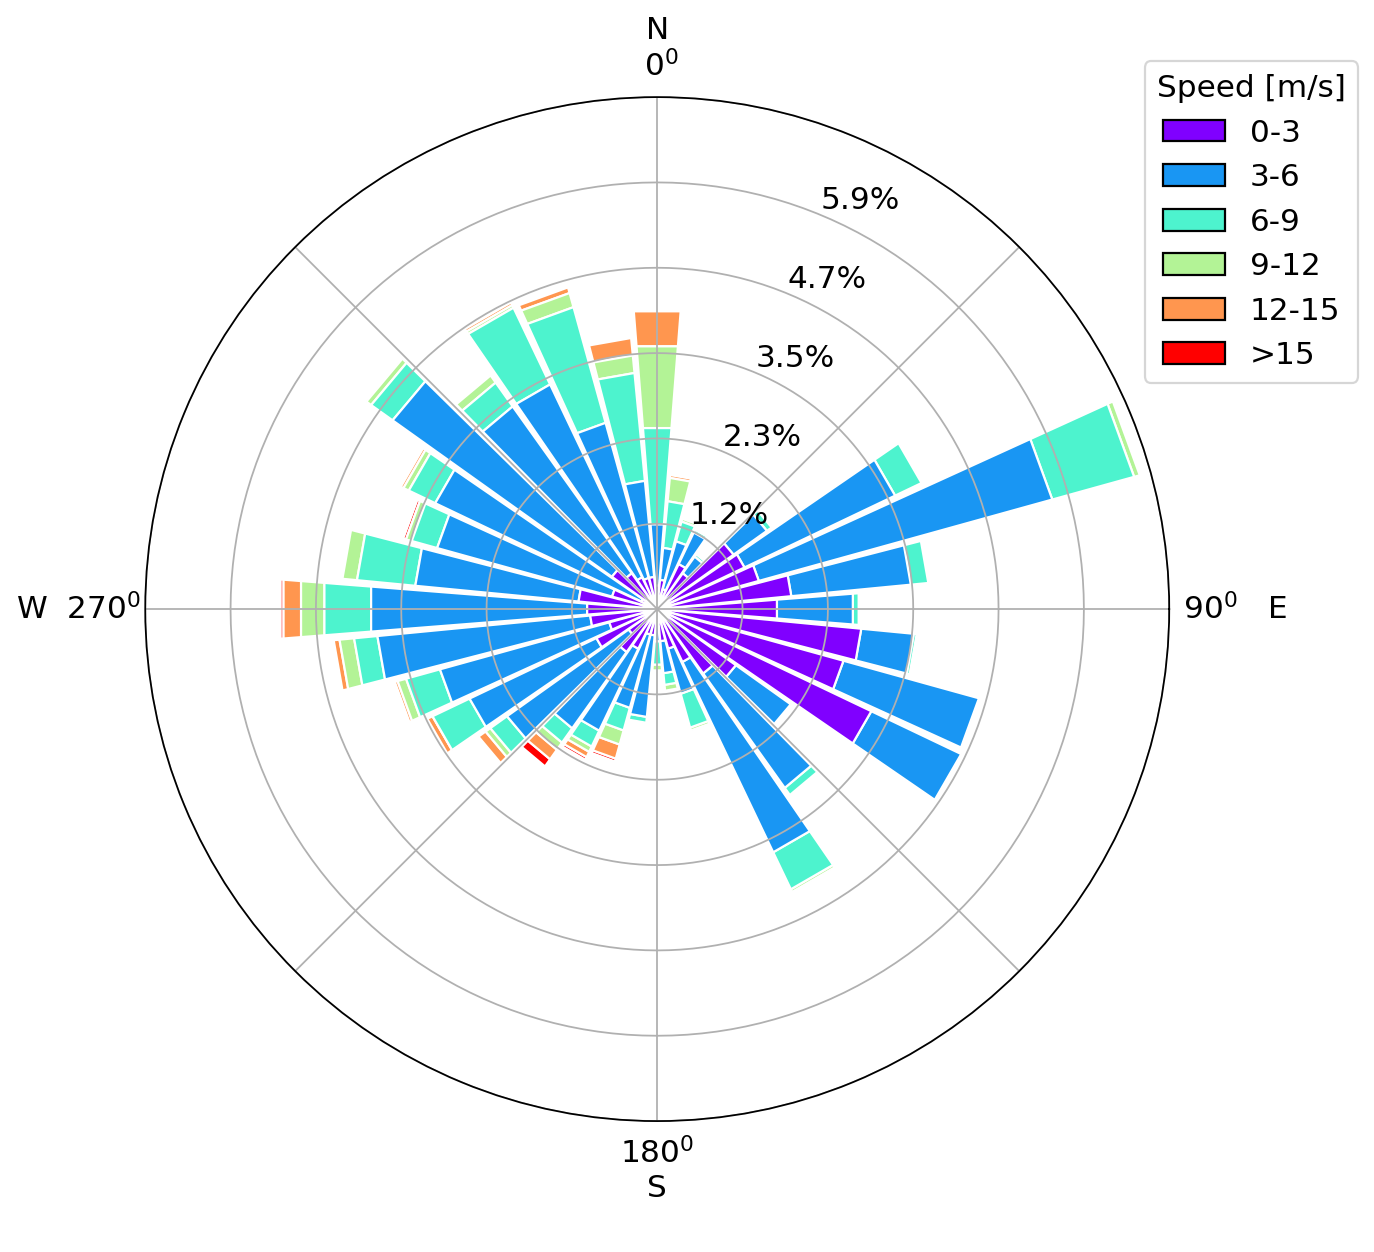

In [108]:
ax = WindroseAxes.from_ax()
ax.bar(wd['Value'], ws['Value'], normed=True, opening=0.9, edgecolor='white',bins=[0,3,6,9,12,15],
       nsector=36,cmap=get_cmap("rainbow"))
labels = ['0-3','3-6','6-9','9-12','12-15','>15']
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.05), lables_override=labels,title='Speed [m/s]')
plt.rcParams.update({'font.size': 14})
ax.set_yticklabels(['1.2%','2.3%','3.5%','4.7%','5.9%'])

ax.set_xticklabels(['       90$^0$   E', '','N\n'+' 0$^0$\n','','W  270$^0$        ', '', '\n\n180$^0$'+'\nS\n', ''])
ax.set_yticks([1,2,3,4,5,6])

# ax.set_rlabel_position(270)  # get radial labels away from plotted line
# ax.set_legend(labels = ['0-3','3-6','6-9','9-12','12-15','>15'], title="wind speeds")

# ax.set_yticks(numpy.arange(0, 2, step=0.5))


plt.show();

In [106]:
# import windrose
# windrose.__file__

In [46]:
df_fr = pd.concat([wd['Value'].rename('direction'), ws['Value'].rename('speed')], axis=1)
df_fr.head()

,direction,speed
0,70.0,2.5
1,90.0,3.0
2,70.0,1.5
3,210.0,4.5
4,270.0,7.5


In [280]:
binedges_s = np.arange(0,ws['Value'].max())
binlabels_s = ['0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15','15-16']
speed_bins = pd.cut(df_fr.speed,bins=binedges_s ,labels=binlabels_s)
# speed_bins

In [281]:
binedges_d = np.arange(180,370,10)
# binlabels_d = ['0-10','10-20','20-30','30-40','40-50','50-60',
#                '60-70','70-80','80-90','90-100','100-110','110-120','120-130',
#                '130-140','140-150','150-160','160-170','170-180','180-190','190-200',
#                '200-210','210-220','220-230','230-240','240-250','250-260','260-270',
#                '270-280','280-290','290-300','300-310','310-320','320-330','330-340',
#                '340-350','350-360']
binlabels_d = ['180-190','190-200',
               '200-210','210-220','220-230','230-240','240-250','250-260','260-270',
               '270-280','280-290','290-300','300-310','310-320','320-330','330-340',
               '340-350','350-360']

In [282]:
# all combinations 
from itertools import product
comb = pd.DataFrame(list(product(binlabels_s, binlabels_d)), columns=['s', 'd'])

In [283]:
comb.head()

,s,d
0,0-1,180-190
1,0-1,190-200
2,0-1,200-210
3,0-1,210-220
4,0-1,220-230


In [284]:
df_total = pd.DataFrame(comb)
df_total['count'] = np.random.randn(np.size(df_total,0))

In [285]:
df_total.head(50)

,s,d,count
0,0-1,180-190,-0.232968
1,0-1,190-200,0.665312
2,0-1,200-210,-1.459536
3,0-1,210-220,-1.261242
4,0-1,220-230,-1.101613
5,0-1,230-240,0.720553
6,0-1,240-250,0.274905
7,0-1,250-260,-0.791749
8,0-1,260-270,-1.899801
9,0-1,270-280,0.910395


In [286]:
ind = 0
for s_edge in binedges_s[:-1]:
    temp_df = df_fr[(df_fr.speed>s_edge) & (df_fr.speed<=s_edge+1)]
    for edge in binedges_d[:-1]:  
        temp_temp_df = temp_df[(temp_df.direction>edge) & (temp_df.direction<=edge+10)]
        df_total.iloc[ind,2] = np.size(temp_temp_df,0)
        ind += 1

In [287]:
df_total.head()

,s,d,count
0,0-1,180-190,2.0
1,0-1,190-200,1.0
2,0-1,200-210,3.0
3,0-1,210-220,2.0
4,0-1,220-230,2.0


In [288]:
df_total['count'].sum()

1650.0

In [289]:
df_fr.shape

(2914, 2)

In [290]:
df_fr.groupby(pd.cut(df_fr.speed,bins=binedges_s ,labels=binlabels_s).value_counts())

In [291]:
df_total['percent'] = df_total['count']/df_total['count'].sum()

In [292]:
df_total.head(50)
df_total.shape

,s,d,count,percent
0,0-1,180-190,2.0,0.001212
1,0-1,190-200,1.0,0.000606
2,0-1,200-210,3.0,0.001818
3,0-1,210-220,2.0,0.001212
4,0-1,220-230,2.0,0.001212
5,0-1,230-240,5.0,0.003030
6,0-1,240-250,2.0,0.001212
7,0-1,250-260,2.0,0.001212
8,0-1,260-270,2.0,0.001212
9,0-1,270-280,5.0,0.003030


(288, 4)

In [297]:
df_total.to_csv('wind_frequencies_180.csv')

In [294]:
# a MUCH shorter way....
a = df_fr.direction.groupby(pd.cut(df_fr.speed,bins=binedges_s ,labels=binlabels_s)).value_counts()

In [255]:
a.to_csv('wind_frequencies_1.csv')

In [296]:
a

speed  direction
0-1    100.0        20
       110.0        16
       120.0        13
       90.0         11
       60.0         10
       50.0          9
       80.0          8
       70.0          7
       130.0         5
       240.0         5
       280.0         5
       30.0          4
       140.0         4
       210.0         3
       310.0         3
       20.0          2
       40.0          2
       150.0         2
       170.0         2
       190.0         2
       220.0         2
       230.0         2
       250.0         2
       260.0         2
       270.0         2
       340.0         2
       350.0         2
       10.0          1
       160.0         1
       180.0         1
                    ..
11-12  350.0         2
       220.0         1
       240.0         1
       250.0         1
       300.0         1
       330.0         1
12-13  360.0         7
       200.0         3
       350.0         3
       210.0         2
       270.0         2
       230.0     